# This is a demo to illustrate the general pipeline of machine learning modelling, using a real-world binary classification problem (breast cancer prediction) as an example. 

# Dataset (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

## The Breast Cancer dataset (WDBC) is available in machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells. The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.


# Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr

import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


# Load WDBC data and visualisation

In [2]:
# load csv file and display some rows
all_df=pd.read_csv('D:\WDBC.csv', index_col=False)
all_df.head()     

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractual dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# ID column is not useful, drop it
all_df.drop('ID', axis=1, inplace=True)
all_df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractual dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# use info method to have a description of the data, e.g. instances, number of features, data types
all_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosis                 569 non-null    object 
 1   radius_mean               569 non-null    float64
 2   texture_mean              569 non-null    float64
 3   perimeter_mean            569 non-null    float64
 4   area_mean                 569 non-null    float64
 5   smoothness_mean           569 non-null    float64
 6   compactness_mean          569 non-null    float64
 7   concavity_mean            569 non-null    float64
 8   concave points_mean       569 non-null    float64
 9   symmetry_mean             569 non-null    float64
 10  fractual dimension_mean   569 non-null    float64
 11  radius_se                 569 non-null    float64
 12  texture_se                569 non-null    float64
 13  perimeter_se              569 non-null    float64
 14  area_se   

In [5]:
# basic statistics of each column
all_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractual dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractual dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Check the distributions of benign and malignent as labeled in Column "diagnosis"

all_df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

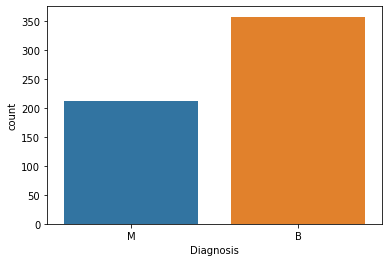

In [7]:
# Draw a bar chart for each label

sns.countplot(x="Diagnosis", data=all_df)

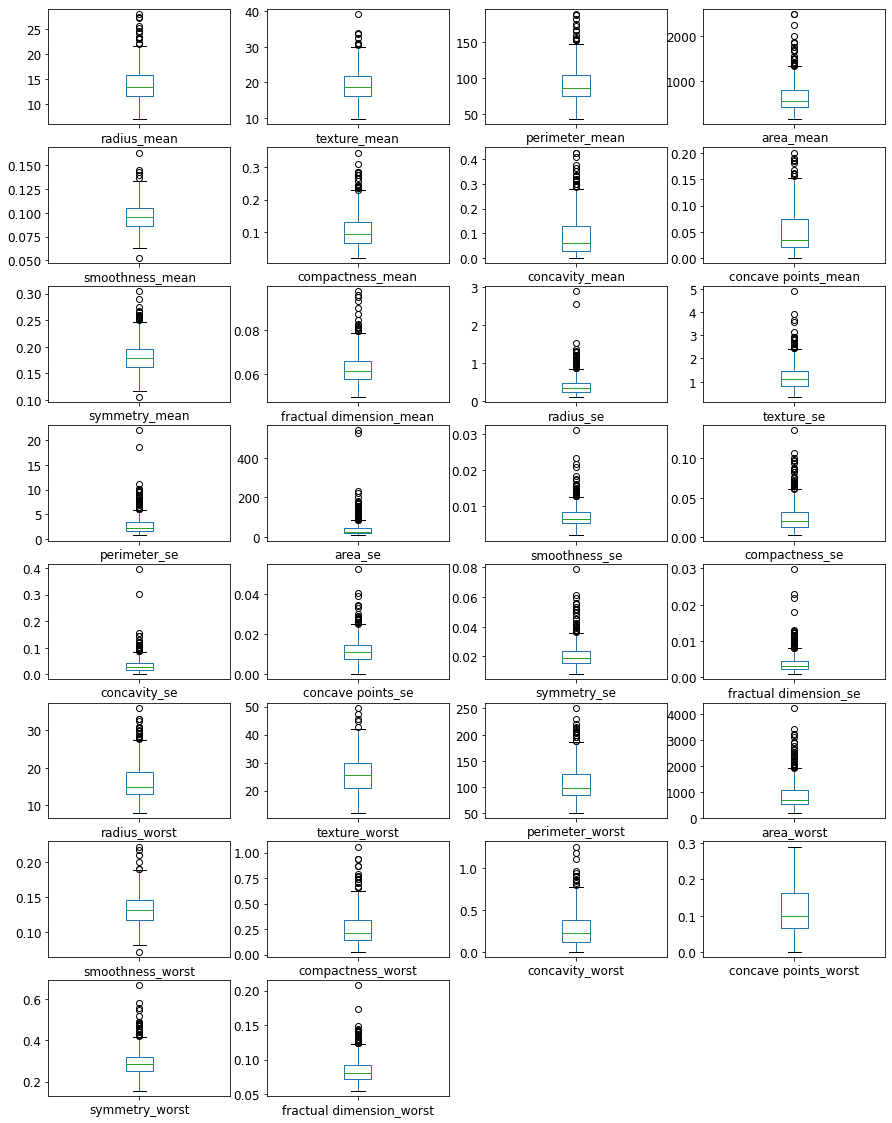

In [48]:
# Use box plot to check the value range and outliers of each feature

data_mean = all_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20));

<AxesSubplot:>

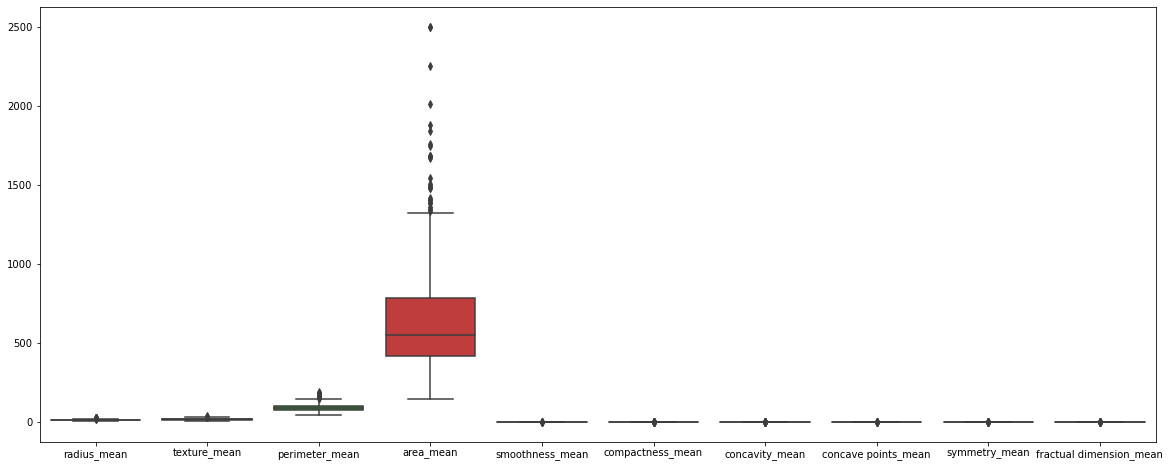

In [8]:
# Compare the features data ranges
# Only for the first 10 features, but try yourself to visualise more features

fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df.iloc[:, 1:11],ax=ax)  

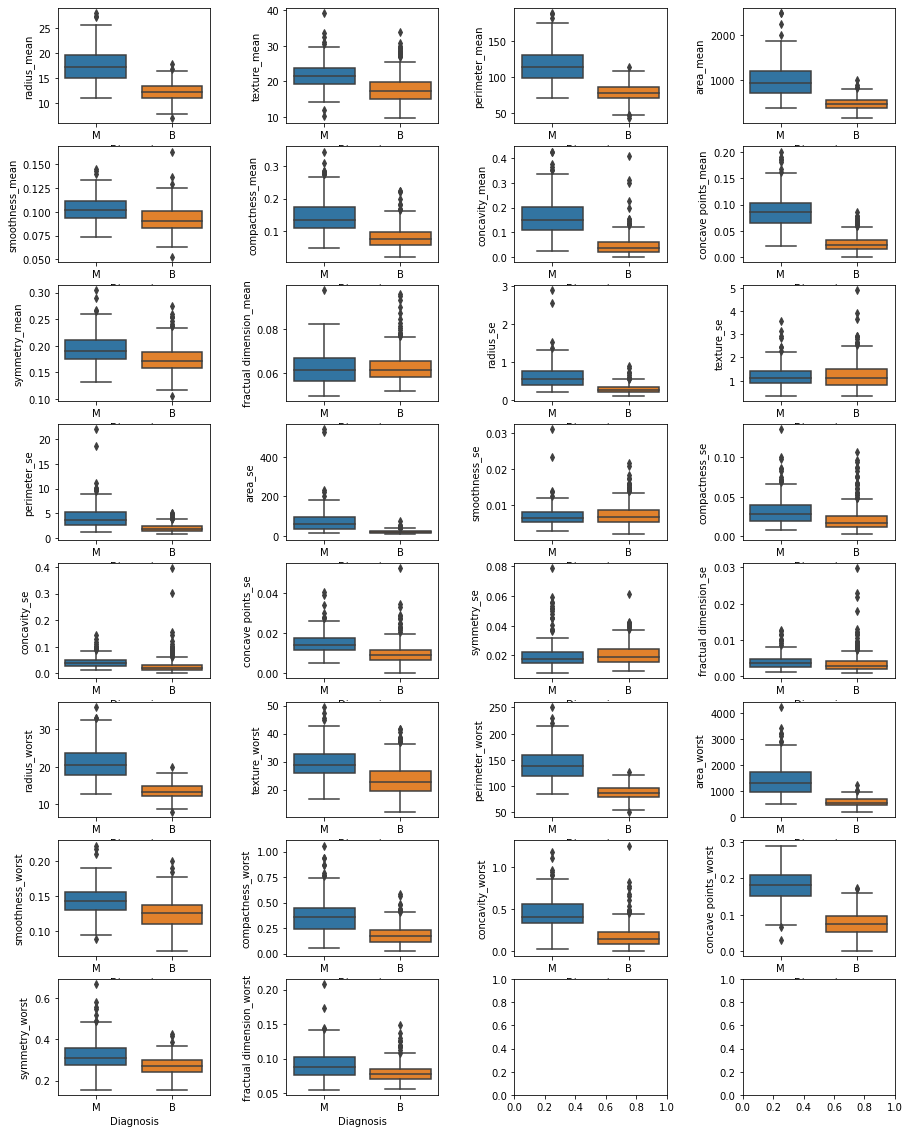

In [9]:
# Use boxplots to see if certain feature can discriminate between beign and malignant

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(all_df.columns[1:]):
    _= sns.boxplot(y=col, x='Diagnosis', data=all_df, ax=axes[i])

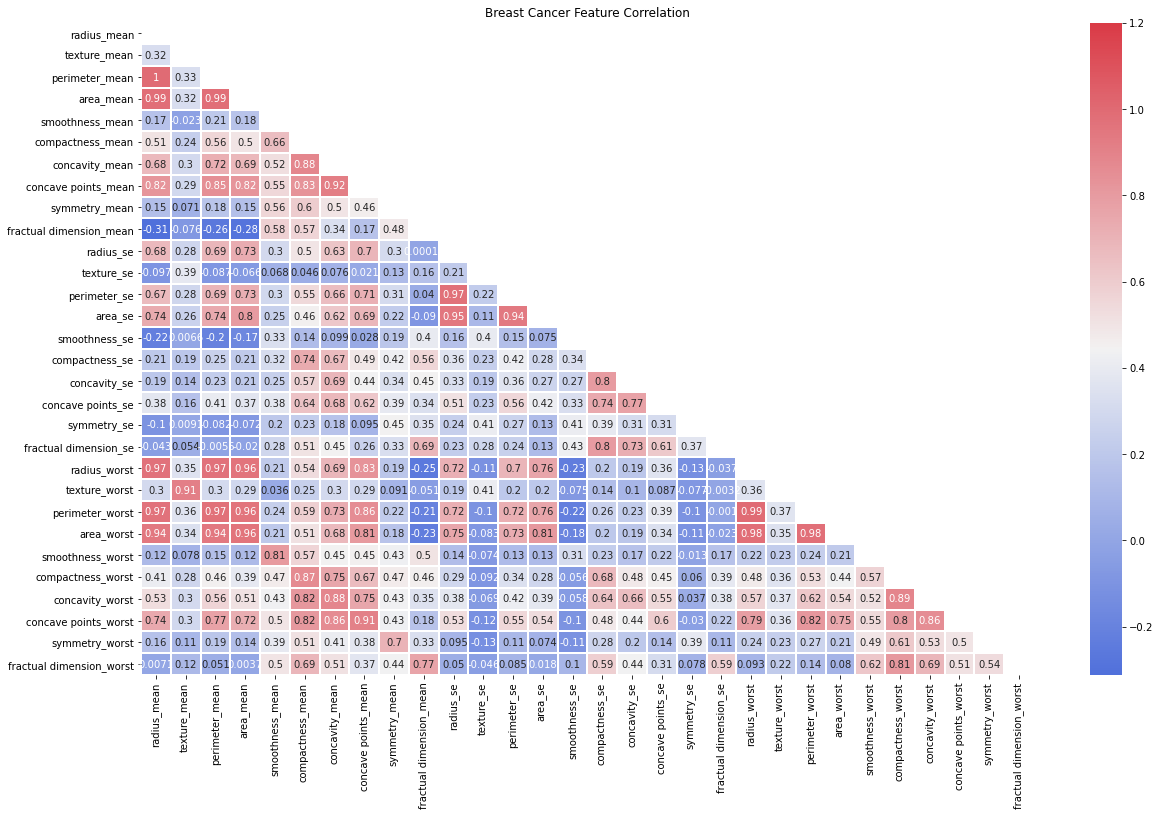

In [54]:
# Compute the correlation matrix to observe the correlations between pair of features.

corrMatt = all_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1);


### What can you observe from the above correlation table?
#### - The area of the tissue nucleus has a strong positive correlation with values of radius and perimeter.
#### - Some paramters are moderately positive correlated (r between 0.5-0.75) are concavity and area, concavity and perimeter etc.


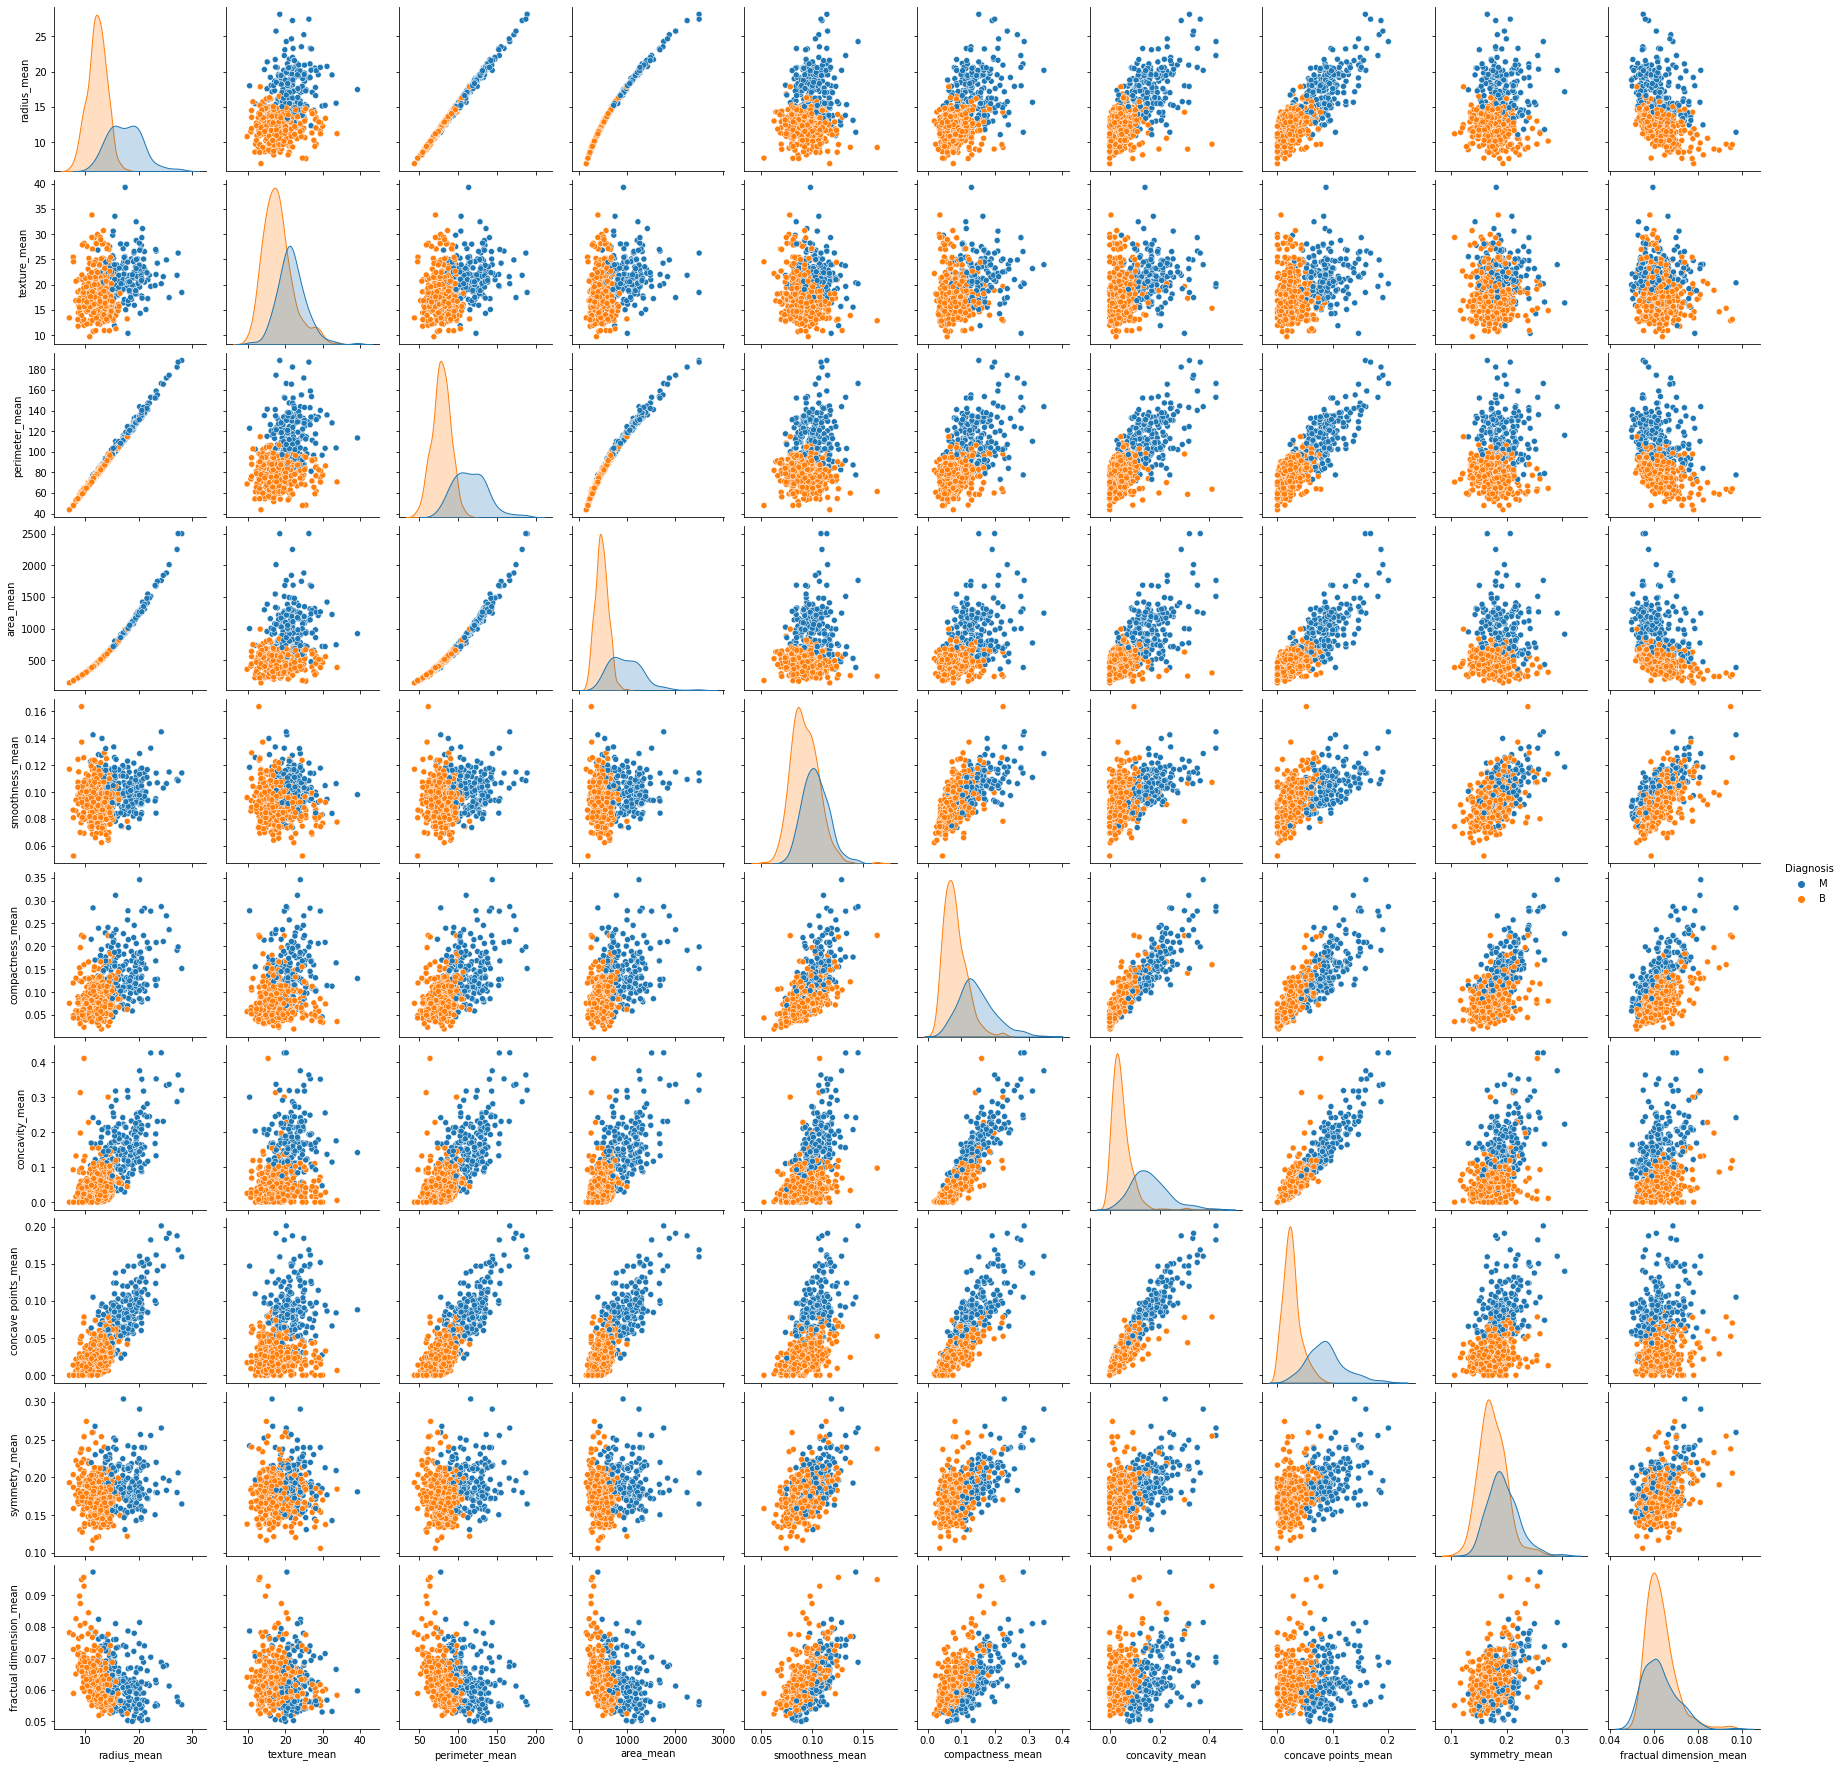

In [10]:
# Scatter plots of the first 10 "mean" features. 
# You may try to plot the other features. 

sns.pairplot(all_df[list(all_df.columns[1:11]) + ['Diagnosis']], hue="Diagnosis");

### What do you observe from the above scatter plots?
#### - Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
#### - Histograms show that mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

# Data pre-processing and analysis

<AxesSubplot:>

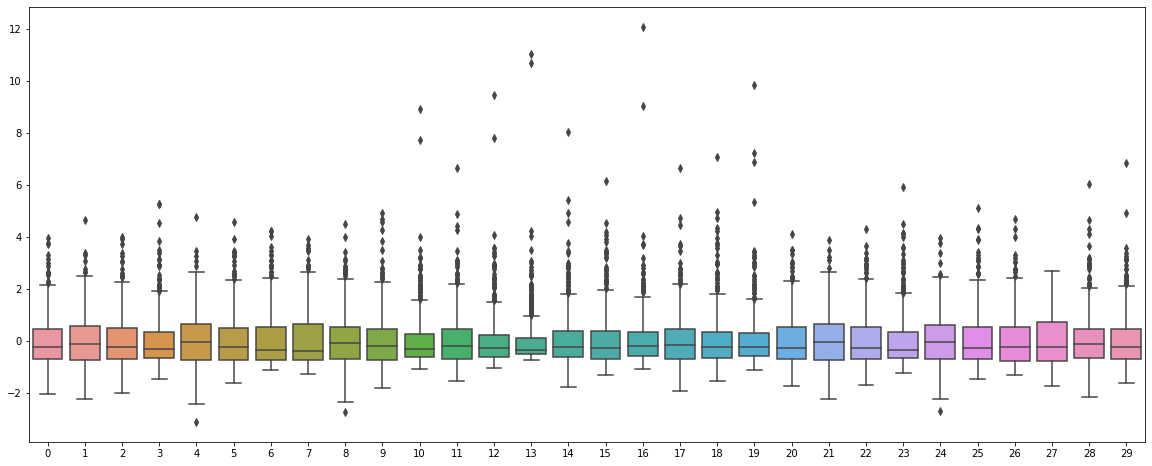

In [19]:
# Assign features to X 
X = all_df.drop('Diagnosis', axis=1)

# Normalise the features to use zero mean normalisation
# only for the first 10 features, but try yourself to visualise more features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)  

In [14]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

feature_names = list(X.columns)
pca = PCA(n_components=10)
Xs_pca = pca.fit_transform(Xs)

In [15]:
# Only retain the first two modes of PCA as the new features
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = Xs_pca[:,0]
PCA_df['PCA_2'] = Xs_pca[:,1]

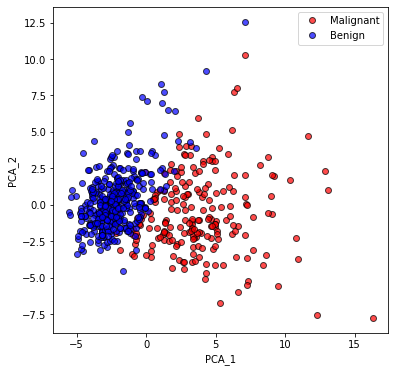

In [73]:
# visualise the Malignant and Benign using the two PCA features. 
plt.figure(figsize=(6,6))
plt.plot(PCA_df['PCA_1'][all_df['Diagnosis'] == 'M'],PCA_df['PCA_2'][all_df['Diagnosis'] == 'M'],'ro', alpha = 0.7, markeredgecolor = 'k')
plt.plot(PCA_df['PCA_1'][all_df['Diagnosis'] == 'B'],PCA_df['PCA_2'][all_df['Diagnosis'] == 'B'],'bo', alpha = 0.7, markeredgecolor = 'k')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign']);

# Predictive model using Support Vector Machine (SVM)

In [85]:
# First, transform the class labels from their original string representation (M and B) into integers 1: M; 0: B

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_df['Diagnosis'] = le.fit_transform(all_df['Diagnosis'])
all_df.head()

# assign numerical label to y
y = all_df['Diagnosis']

In [67]:
# Then stratified sampling. Divide data into training and testing sets.
# Pay attention that we are using the normalised data value Xs rather than X. You may try X.

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=1, stratify=y)

In [68]:
# Use kernal SVM classifier to train a model based on 70% of the data

from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(Xs_train, y_train)

SVC(gamma='auto', probability=True)

In [69]:
# Classify the test dataset and output the accuracy

classifier_score = clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.95


In [70]:
# Now let's try K-fold cross validation
# Get average of 5-fold cross-validation score using an SVM classifier.
# Please try different number of folds and oberve the results

from sklearn.model_selection import cross_val_score
n_folds = 5
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
cv_error = np.average(cross_val_score(clf_cv, Xs, y, cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.97


In [71]:
# Now Let's try classification with some selected features, not all the features
# With 3 features, the classification accuracy is already quite good ~95%.
# Try to include more features and observe.

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# model with just 3 best features selected (k=3)

clf_fs_cv = Pipeline([
    ('feature_selector', SelectKBest(f_classif, k=3)),
    ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True))
])

scores = cross_val_score(clf_fs_cv, Xs, y, cv=5)  # 5 folds.

print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%"  %avg)


[0.93859649 0.95614035 0.96491228 0.94736842 0.94690265]
Average score and standard deviation: (95.08 +- 0.402)%


# Evaluation results

In [72]:
# We use confusion matrix (TP, TN, FP, FN) to visualise the performance

from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.fit(Xs_train, y_train).predict(Xs_test)
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           B       0.95      0.98      0.96       107
           M       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



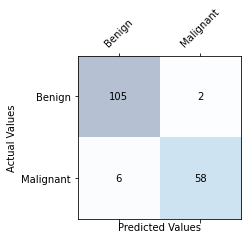

In [58]:
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
classes=["Benign","Malignant"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');
print(classification_report(y_test, y_pred ))

<ipython-input-74-45e69d97d5cd>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect(1);


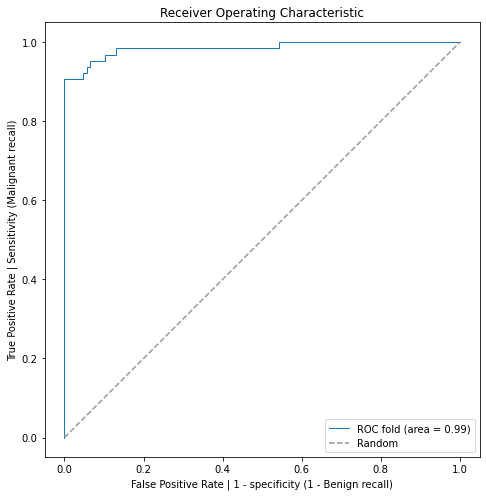

In [74]:
# Plot the receiver operating characteristic curve (ROC).
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(Xs_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate | 1 - specificity (1 - Benign recall)')
plt.ylabel('True Positive Rate | Sensitivity (Malignant recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.axes().set_aspect(1);

# Now let's try some other modelling methods: Logistic regression; K nearest neighbour, Gaussian Naive Bayes, Dicision Trees, Linear Discriminant Analysis

In [86]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from tqdm import tqdm_notebook as tqdm

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 5
num_instances = len(Xs_train)
scoring = 'accuracy'
results = []
names = []
for name, model in tqdm(models):
    kf = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, Xs, y, cv=kf, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)

print('5-Fold cross-validation accuracy score for the training data for all the classifiers') 
for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std()))



<ipython-input-86-cf4d54f5f684>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name, model in tqdm(models):


  0%|          | 0/6 [00:00<?, ?it/s]

5-Fold cross-validation accuracy score for the training data for all the classifiers
LR        : 0.977177 (0.011881)
LDA       : 0.957848 (0.025028)
KNN       : 0.959587 (0.017171)
CART      : 0.912094 (0.026732)
NB        : 0.929685 (0.031910)
SVM       : 0.970129 (0.014242)


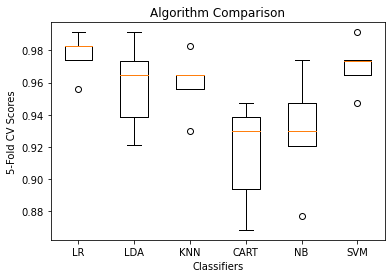

In [82]:
# Compare the algorithms
plt.title( 'Algorithm Comparison' )
plt.boxplot(results)
plt.xlabel('Classifiers')
plt.ylabel('5-Fold CV Scores')
plt.xticks(np.arange(len(names)) + 1, names);

## It is observed that for this application, a simple linear regression works better than non-linear models
## Here're some practice for you to try
## 1- Observe the results if we don't normalise the feature value range
## 2- Currently all the modelling methods (i.e. SVM, KNN, LG, etc) used default parameter settings. Check the related documents and try different settings to see if the performance can be improved.
## 3- Check other feature selection methods and compare if the automatically selected features are consistent with the obervations using the correlation plots and box plots. 